# Ejercicio 1
***

### <u>Objetivo</u>:
El propósito de este ejercicio es llevar a cabo un análisis exploratorio de un conjunto de datos que
contiene información demográfica y económica de las provincias de Argentina
(provincias_datos_2022.xlsx). Este análisis tiene como objetivo realizar una exploración de las
variables e identificar características relevantes o asociaciones que permitan obtener conocimientos
relevantes para la toma de decisiones informadas en diversos ámbitos, como el económico, social y
político.

### <u>Carga del dataset</u>

In [60]:
# Declaracion de consantes y variables
PROVINCIAS_DATASET = 'data/provincias_datos_2022.csv'
FONT_COLOR = "b"

In [61]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from shared import trim_column_names;

# Importando dataset
df = pd.read_csv(PROVINCIAS_DATASET, delimiter=';')

# Limpiando nombres de columnas
df = df.rename(columns=lambda x: trim_column_names(x) )
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   PROVINCIA                       24 non-null     object 
 1   POBLACION_MILES                 23 non-null     float64
 2   HOGARES_MILES                   24 non-null     float64
 3   INGRESOS_LABORALES_MILES_PESOS  23 non-null     object 
 4   TASA_DE_EMPLEO                  24 non-null     object 
 5   SUPERFICIE_KM2                  24 non-null     object 
 6   EXPORTACIONES_MILL_USD          24 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.4+ KB


### <u>Normalizacion de datos</u>
1. Los datos fueron cargados como flotantes para las columnas POBLACION_MILES y HOGARES_MILES las cuales
deben transformarse a valores enteros para poder trabajar correctamente.
2. Se hace la conversion de valores tipo object a valores flotantes para el resto de la columanas que 
poseen datos numericos.
3. Se normaliza los datos y la escala para las columnas POBLACION_MILES y HOGARES_MILES 

In [62]:
import numpy as np

# Normalizando los tipos de datos 
# Se nota que hay dos escalas de valores distintas para la cantidad de poblacion y hogares
for col in df.columns[1:3]:
    
    # Se interpolan los valores numericos tipo NaN
    if df[col].isna().sum() > 0:
        df[col].interpolate(inplace=True)

    # La siguientes sentencias solo se ejecutan la primera vez
    # cuando los datos todavia no fueron casteados a int64
    if df[col].dtype != 'int64':
        # Se multiplica por 1000 y se convierte a int para que quede como entero las dos primeras columnas
        df[col] = df[col] * 1000
        df[col] = df[col].astype('int64')

        # Valores de POBLACION_MILES menores a 100mil estaban en escala de miles por lo que se lleva a escala por unidades
        if col=="POBLACION_MILES":
            df[col] = np.where(df[col] < 100000 , df[col]*1000 , df[col])

        # Valores de HOGARES_MILES menores a 10mil estaban en escala de miles por lo que se lleva a escala por unidades
        if col=="HOGARES_MILES":
            df[col] = np.where(df[col] < 10000, df[col]*1000 , df[col])

# Se convierte desde string a float64 el resto de los valores para el resto de las columnas
for col in df.columns[3:]:
    if df[col].dtype != 'float64':
        df[col] = df[col].str.replace('.','')
        df[col] = df[col].str.replace(',','.').astype('float64')    
    
    if df[col].isna().sum() > 0:
        df[col].interpolate(inplace=True)

# Se mejoran el nombre de algunas colum
df.rename(columns={
    'POBLACION_MILES' : 'POBLACION',
    'HOGARES_MILES': 'HOGARES',
    'PROVINCIA': 'PROVINCIAS'
    },
    inplace=True)
df

/var/folders/78/gjmx13nn7m71_ljb8h7lkxd80000gq/T/ipykernel_26039/1180206165.py:29: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[col] = df[col].str.replace('.','')


,PROVINCIAS,POBLACION,HOGARES,INGRESOS_LABORALES_MILES_PESOS,TASA_DE_EMPLEO,SUPERFICIE_KM2,EXPORTACIONES_MILL_USD
0,Ciudad Autónoma de Buenos Aires,3004000,1263000,211877384.0,4.7,205.9,311.163
1,Buenos Aires,17292000,5738000,623250917.0,8.7,305907.4,33024.657
2,Catamarca,336000,102000,8460986.0,7.3,101486.1,201.030
3,Chaco,3477000,1251000,122790341.0,6.5,99763.3,516.336
4,Chubut,967000,287000,24733558.0,5.3,224302.3,2575.372
5,Córdoba,1044000,321000,22744468.0,2.6,164707.8,12851.979
6,Corrientes,591000,205000,30606036.0,3.6,89123.3,273.185
7,Entre Ríos,1252000,431000,40510249.0,6.4,78383.7,1911.902
8,Formosa,509000,148000,9586123.0,3.3,75488.3,40.614
9,Jujuy,696000,197000,17044750.0,5.1,53244.2,873.440


### <u>Grafica de correlaciones entre poblacion, ingresos por millones de pesos y exportaciones en dolares</u>
1. Se escala la poblacion a unidades de millones de habitantes
2. Se escala los ingresos por miles de pesos a millones de pesos
3. Se procede a calcular la correlacion de las variables utilizando dos graficos de dispersiones.

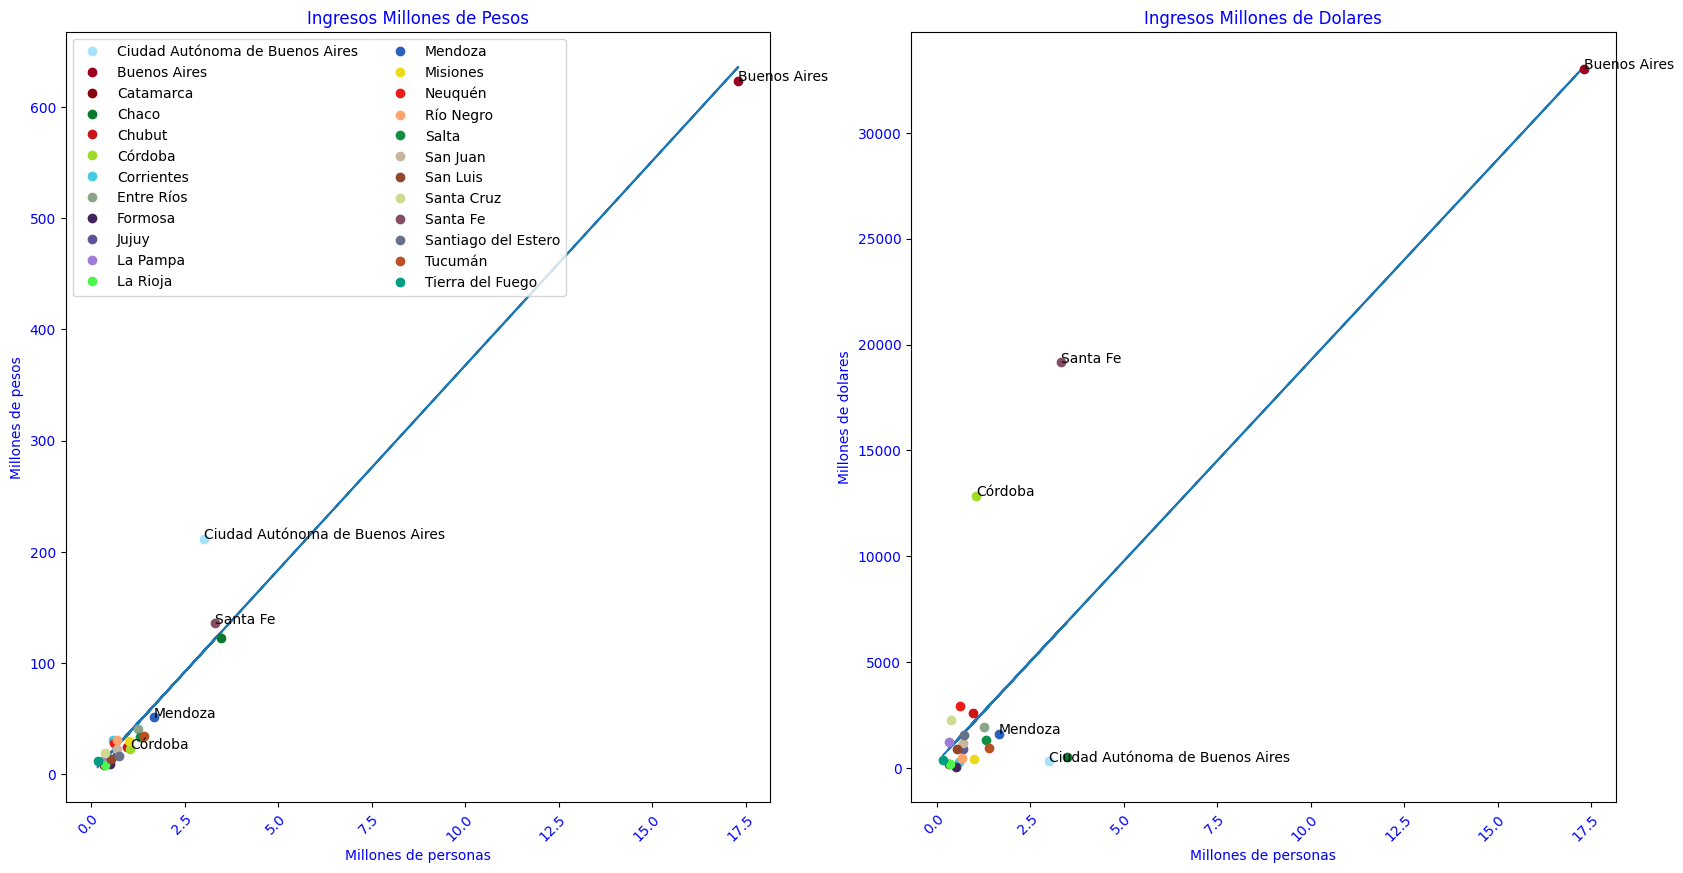

In [63]:
import random

PROV_RELEVANTES=("Buenos Aires", "Ciudad Autónoma de Buenos Aires", "Córdoba", "Santa Fe", "Mendoza")
x_problacion_miles = df["POBLACION"]/(10**6) # Cambiando la poblacion a millones de habitantes
y_exp_mill_usd = df["EXPORTACIONES_MILL_USD"]
y_ingresos_mill_pesos = df["INGRESOS_LABORALES_MILES_PESOS"]/(10**6) # Cambiando la unidad de pesos a millones de pesos
ys = [y_ingresos_mill_pesos, y_exp_mill_usd]

p = [ np.polyfit(x_problacion_miles, y, deg=1) for y in ys ]
y_est_arr = [ a * x_problacion_miles + b for a,b in p ]
y_err_arr = x_problacion_miles.std() * np.sqrt(1/len(x_problacion_miles) + (x_problacion_miles - x_problacion_miles.mean())**2 / np.sum((x_problacion_miles - x_problacion_miles.mean())**2))

fig, axs = plt.subplots(1, 2, figsize=(20, 10), sharey=False, sharex=False)

colors = { provincia : "#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]) for provincia in  df["PROVINCIAS"]}

for i in range(0,2):
    axs[i].plot(x_problacion_miles, y_est_arr[i], '-')
    #axs[i].fill_between(x_problacion_miles, y_est_arr[i] - y_err_arr[i], y_est_arr[i] + y_err_arr[i], alpha=0.2)
    for j in range(0, len(df["PROVINCIAS"]) ):
        axs[i].plot(x_problacion_miles[j], ys[i][j], 'o', color=colors[ df["PROVINCIAS"][j] ], label=df["PROVINCIAS"][j])
        if df["PROVINCIAS"][j] in PROV_RELEVANTES:
            axs[i].text(x_problacion_miles[j],ys[i][j], df["PROVINCIAS"][j]) 
    plt.setp(axs[i].get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor",color=FONT_COLOR)
    plt.setp(axs[i].get_yticklabels(), color=FONT_COLOR)

axs[0].set_title("Ingresos Millones de Pesos", color=FONT_COLOR)
axs[0].set_xlabel("Millones de personas", color=FONT_COLOR)
axs[0].set_ylabel("Millones de pesos", color=FONT_COLOR)

axs[1].set_title("Ingresos Millones de Dolares", color=FONT_COLOR)
axs[1].set_xlabel("Millones de personas", color=FONT_COLOR)
axs[1].set_ylabel("Millones de dolares", color=FONT_COLOR)

axs[0].legend(loc="upper left",ncol=2)
plt.show()

       


## Conclusion 1 
***

### <u>(Ingresos en pesos) / (cantidad de poblacion)</u>
1. Se ve una estrecha correlacion entre la cantidad de poblacion y los ingresos en millones de pesos por cada provincia. 
Mientras mas grande es la poblacion mas es la cantidad de ingresos laborales por cada provincia.
2. Tambien se destaca facilmente en el primer grafico que el promedio de *ingresos laborales en **pesos*** con respecto a la poblacion de la **Ciudad Autonoma de Buenos Aires**
es mayor comparada con las otras provincias, lo que significa que sus ciudadanos tienen mejores salarios.

### <u>(Exportaciones en dolares) / (cantidad de poblacion)</u>
3. No hay una relacion lineal muy fuerte entre la cantidad de poblacion y las exportaciones en dolares. En el item anterior habiamos visto que los ingresos de pesos sobre la cantidad de poblacion tenian una fuerta correlacion, pero no es el caso para la exportacion en dolares, por lo que hay provincias que exportan mas que otras con respecto a su cantidad de habitantes como **Cordoba, Buenos Aires y Santa Fe**. 

### <u>Matriz de correlacion</u>
Vamos a verificar los items de la **conclusion 1** utilizando una matriz de correlacion aplicando formlas de Pearson y Spearman

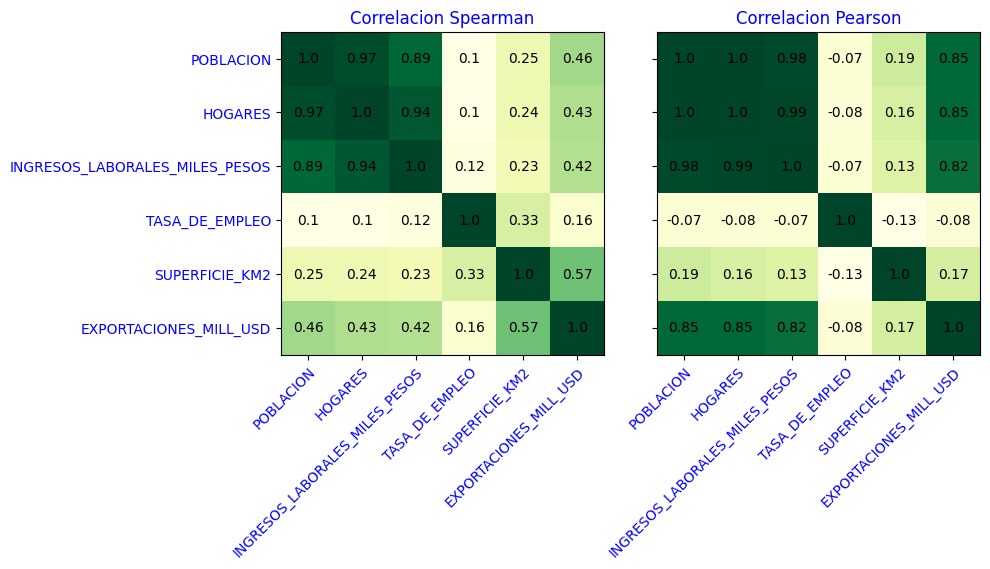

In [64]:
import numpy as np
import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt

keys = ["POBLACION","HOGARES","INGRESOS_LABORALES_MILES_PESOS","TASA_DE_EMPLEO","SUPERFICIE_KM2","EXPORTACIONES_MILL_USD"]

corr_pearson = df[keys].corr(method = 'pearson').round(2).values
corr_spearman = df[keys].corr(method = 'spearman').round(2).values

fig, axs = plt.subplots(1,2,sharey=True,sharex=False,figsize=(10,10) )

ims = axs[0].imshow(corr_spearman, cmap="YlGn")
imp = axs[1].imshow(corr_pearson,cmap="YlGn")

# Mostrar los respectivos ticks con sus entradas correspondientes
[ax.set_xticks(np.arange(len(keys)), labels=keys) for ax in axs ]
[ax.set_yticks(np.arange(len(keys)), labels=keys) for ax in axs ]

# Rotacion y alineacion de los labels
[plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor",color=FONT_COLOR) for ax in axs ]

[plt.setp(ax.get_yticklabels(), ha="right",
color=FONT_COLOR) for ax in axs ]

# Loop sobre las dimensiones de los datos y se crean los textos para cada celda
for i in range(len(keys)):
    for j in range(len(keys)):
            axs[0].text(j, i, corr_spearman[i, j],
                    ha="center", va="center", color="black")
            axs[1].text(j, i, corr_pearson[i, j],
                    ha="center", va="center", color="black")
            
axs[0].set_title("Correlacion Spearman", color=FONT_COLOR)
axs[1].set_title("Correlacion Pearson", color=FONT_COLOR)

fig.tight_layout()
plt.show()

## <u>Conclusion 2</u>
***

1. Se verifican los items planteados en la conclusion 1 : 
    - Existe una fuerte correlacion entre la cantidad de Poblacion y los ingresos en millones de pesos
    - No hay una correlacion muy marcada entre la cantidad de Poblacion y las exportaciones en dolares.
2. Se descubre que hay relacion estrecha entre la cantidad de hogares y la cantidad de poblacion. Se concluye que mientras mas grande la poblacion mas hogares en cada provincia.
3. No se identifica ninguna relacion significativa entre la **Tasa de empleo** y **Superficie en km2** con respectos a las otras variables. 
    - Se deduce que no porque una provincia tenga mas territorio va a tener mas exportaciones o mayor cantidad de poblacion.
    - La tasa de empleo no influye en forma directa en los ingresos laborales en pesos de una provincia. Esto puede estar relacionado a que la diferencia del salario entre los miembros de una poblacion es muy grande o que los datos recolectados de la tasa de empleo no son correctos. 


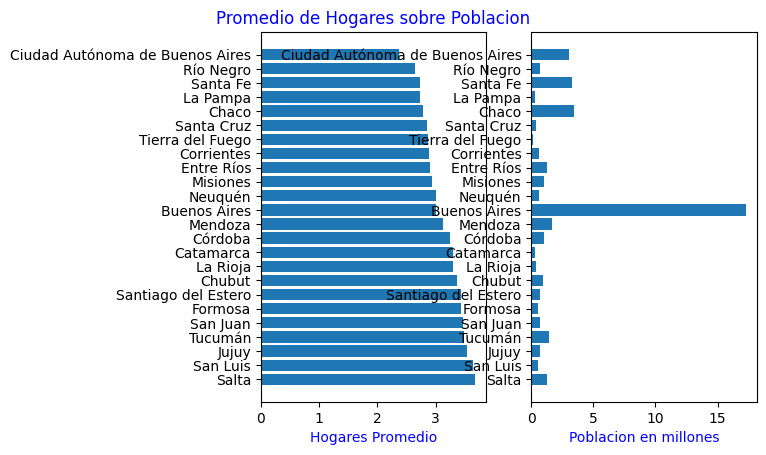

In [68]:
avg_personas_x_hogar = pd.DataFrame(
   dict(
      provincias=df["PROVINCIAS"],
      hogaresPromedio=[ row[1]["POBLACION"]/row[1]["HOGARES"] for row in df.iterrows() ],
      poblacionMillones=[ row[1]["POBLACION"]/(10**6) for row in df.iterrows() ],
   )
).sort_values("hogaresPromedio")


figs, axs = plt.subplots(1,2, sharey=True)

axs[0].barh("provincias", "hogaresPromedio", data=avg_personas_x_hogar,  align='center')
axs[0].invert_yaxis()  
axs[0].set_xlabel('Hogares Promedio', color=FONT_COLOR)
axs[0].set_title('Promedio de Hogares sobre Poblacion', color=FONT_COLOR)


axs[1].barh("provincias", "poblacionMillones", data=avg_personas_x_hogar,  align='center')
axs[1].invert_yaxis()  
axs[1].set_xlabel('Poblacion en millones', color=FONT_COLOR)

plt.show()


## <u>Conclusion 3</u>
***

1. Se observa una gran concentracion de poblacion en la **Ciudad Autonoma de Buenos Aires** y el menor promedio de hogares por habitantes. 